In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading Dataset

In [3]:
glass=pd.read_csv('C:/Users/rayad/samatha assinments/knn/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### EDA

In [46]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [23]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

<Figure size 432x720 with 0 Axes>

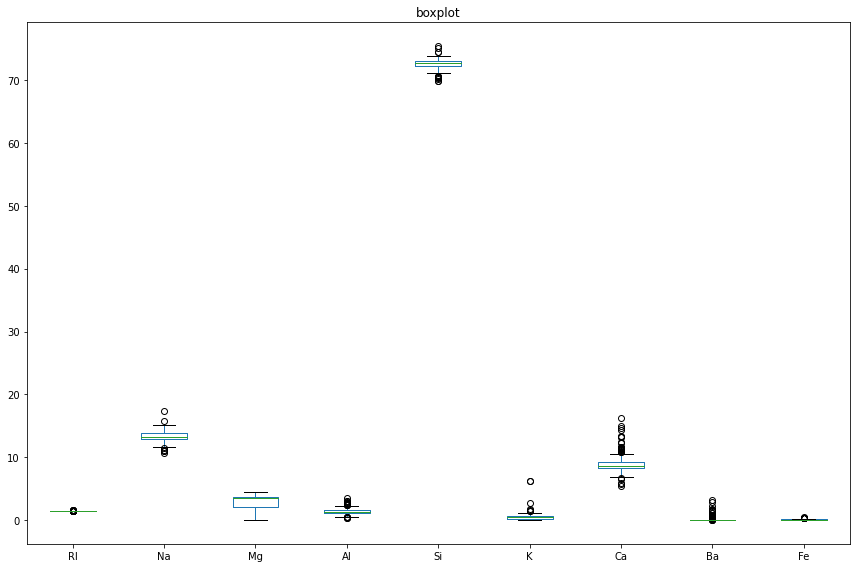

In [37]:
plt.figure(figsize=(6,10))
# plt.rcParams["figure.autolayout"] = True

ax = glass[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].plot(kind='box', title='boxplot')

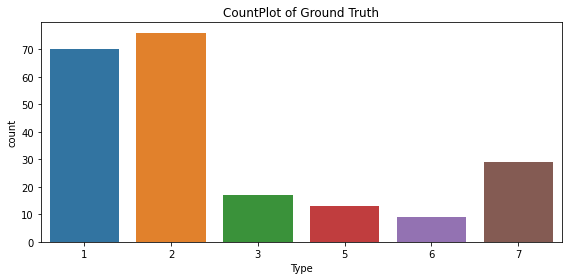

In [34]:
plt.figure(figsize=(8,4))
sns.countplot(glass['Type'])
plt.title('CountPlot of Ground Truth')
plt.show()
# After looking at the class instances, we can conclude that the dataset is highly imbalanced.

#### KNN Model Building

In [42]:
x=glass.iloc[:,0:9]
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [43]:
y=glass.iloc[:,9]

In [44]:
glass.iloc[:,9].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [45]:
print(x.shape)
print(y.shape)

(214, 9)
(214,)


In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [74]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
accuracy_score(y_test,model.predict(x_test))

0.5813953488372093

In [85]:
# from the above acuuracy score is very less and not satisfied
# so we can use k value in for loop to iterate process and find at which point we are getting high accuracy score
import warnings
warnings.filterwarnings('ignore')
k_range=range(1,40,2)
k_scores=[]

for k in k_range:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    k_scores.append(accuracy_score(y_test,model.predict(x_test)))
   

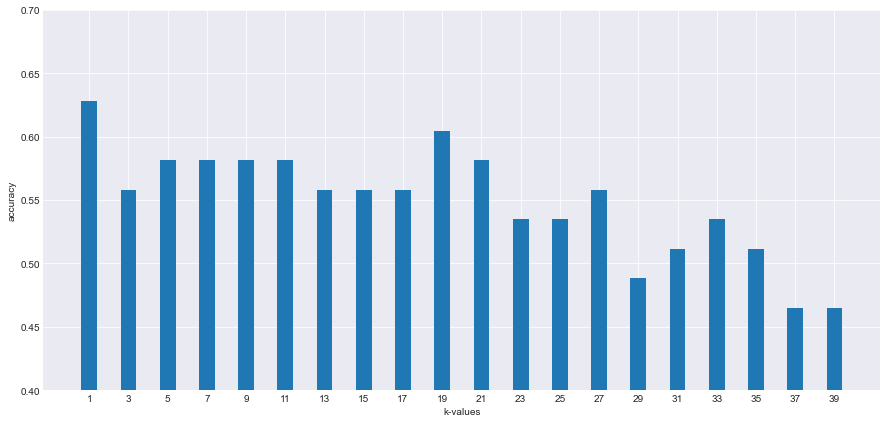

In [87]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
plt.figure(figsize=(15,7))
plt.bar(k_range,k_scores)
plt.xlabel("k-values")
plt.ylabel("accuracy")
plt.xticks(k_range)
plt.ylim(0.4,0.7)
plt.show()

### final model

In [80]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
accuracy_score(y_test,model.predict(x_test))

0.627906976744186

### Model Accuracy

In [83]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           1       0.33      0.67      0.44         9
           2       0.83      0.53      0.65        19
           3       0.67      0.40      0.50         5
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       0.86      1.00      0.92         6

    accuracy                           0.63        43
   macro avg       0.78      0.68      0.70        43
weighted avg       0.73      0.63      0.64        43

